# Installation and training of the YOLO model

#### First, we need to clone yoloV5 repository from GitHub and install all the requirements

In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11857, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 11857 (delta 26), reused 26 (delta 7), pack-reused 11800
Receiving objects: 100% (11857/11857), 12.46 MiB | 22.86 MiB/s, done.
Resolving deltas: 100% (8140/8140), done.


In [7]:
# Installing the requirements
%cd yolov5
!pip3 install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 15.5 MB/s 


#### Let's check the available GPU for us

In [15]:
!nvidia-smi

Sat Aug 20 19:12:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Set up the model

#### These are the models available for us


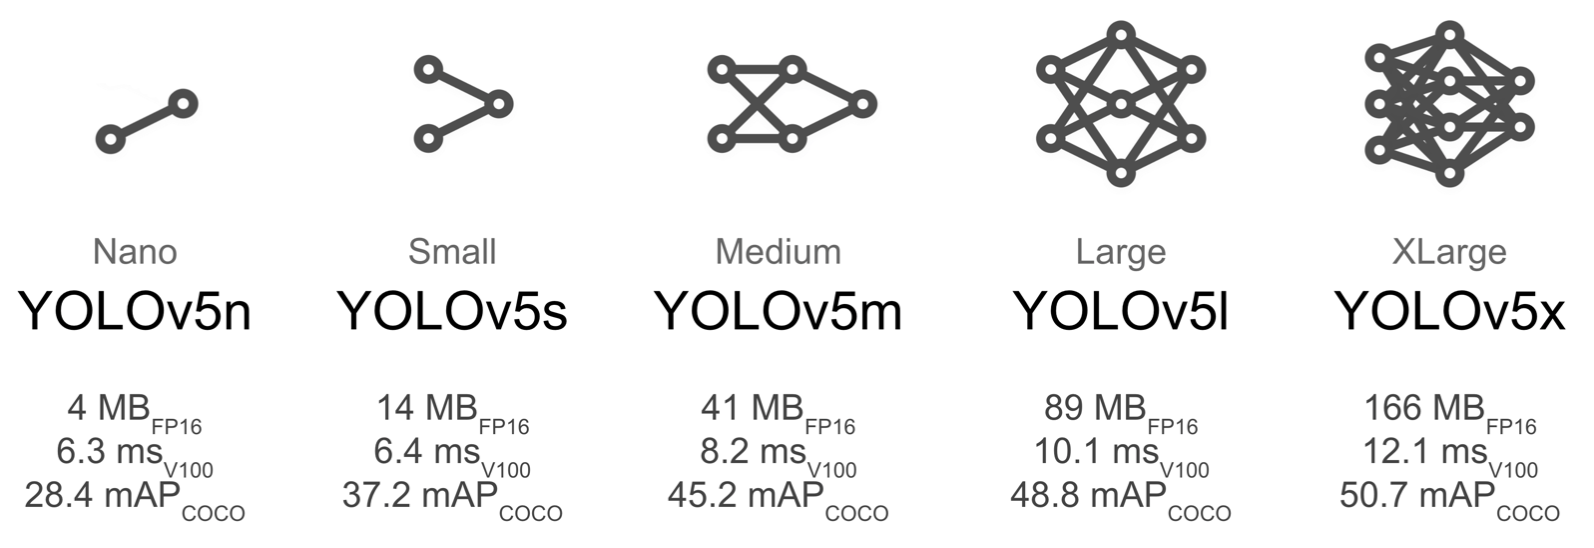

In [2]:
import PIL.Image as Image
from pathlib import Path

Image.open("yolov5/YoloModels.png")

I’ve decided to choose a model: “YOLOv5x”, because we don’t need high-performance, but more accurate model.

#### We need two configuration files. One for the dataset and one for the model we're going to use.

For the dataset config file I've specified:

train: ../petsYOLO/images/train/
val: ../petsYOLO/images/val/

nc: 2

names:
    
0: dog
    
1: cat


And for the model config file, besides default parameters, I just specified the number of classes, which in our case is 2.

### Model Training

Here I'm specifying:


Image size for training: 640

Batch size: 4

Number of Epochs: 30

Dataset config file path

Model config file path

Using pretrained weights for the model

Name of the model

Cache the images for possible later hyperparams tuning

In [7]:
!python3 train.py --img 640 --batch 4 --epochs 30 --data ./data/pets.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt --name yolov5x_pets --cache

train: weights=yolov5x.pt, cfg=./models/yolov5x.yaml, data=./data/pets.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5x_pets, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-29-gf258cf8 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

### Visualizing the Training Process

In [12]:
# specifying training process directory
directory = Path("yolov5/runs/train/yolov5x_pets/src/training")

#### Metrics over Iterations

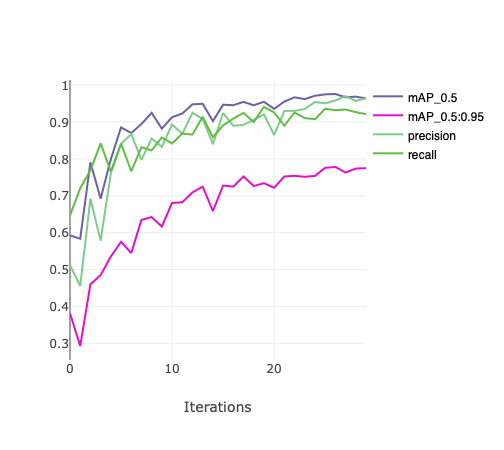

In [18]:
img = Image.open(f"{directory}/metricsTraining.png")

img

#### Train Loss over Iterations

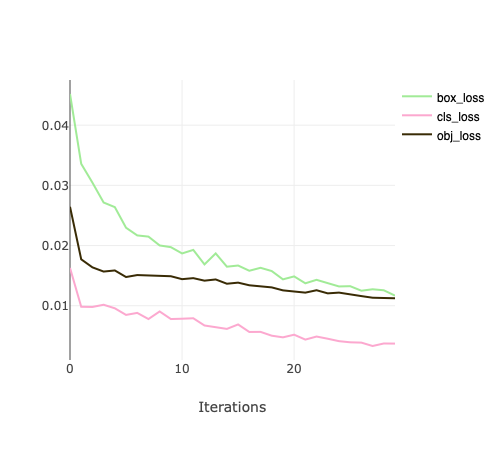

In [19]:
img = Image.open(f"{directory}/trainIterations.png")

img

#### Val Loss over Iterations

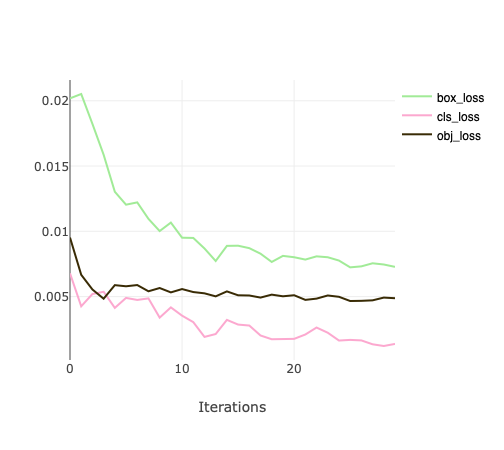

In [20]:
img = Image.open(f"{directory}/valIterations.png")

img

### Visualizing the Training Results

In [21]:
# specifying the results directory
directory = Path("yolov5/runs/train/yolov5x_pets/src/results")

#### Confusion Matrix

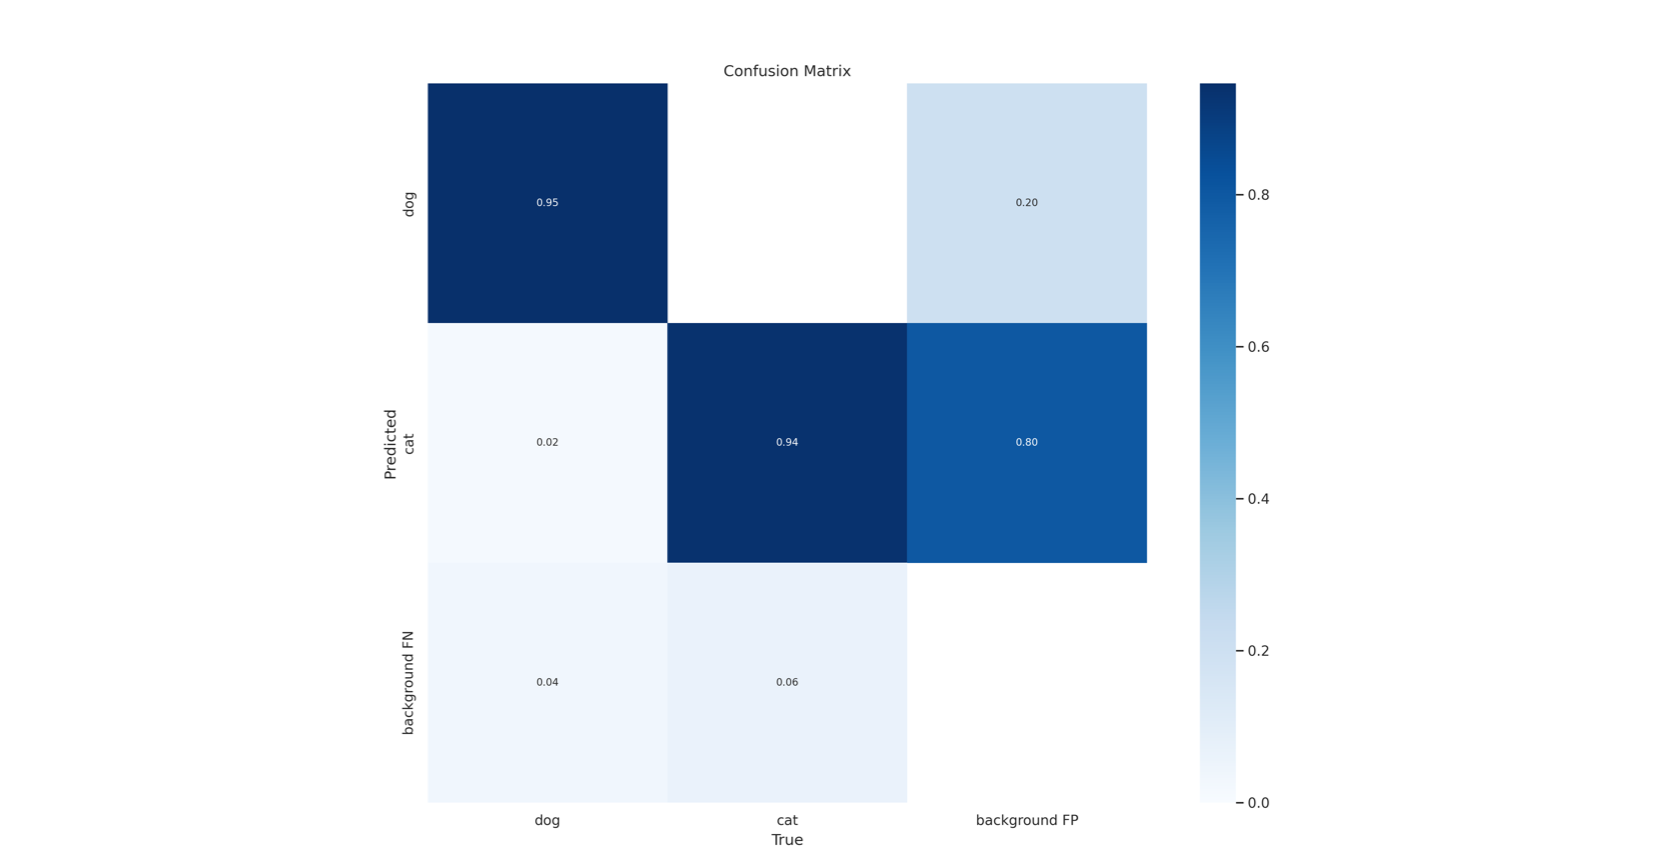

In [22]:
img = Image.open(f"{directory}/ConfusionMatrix.png")

img

#### Metrics over Iterations

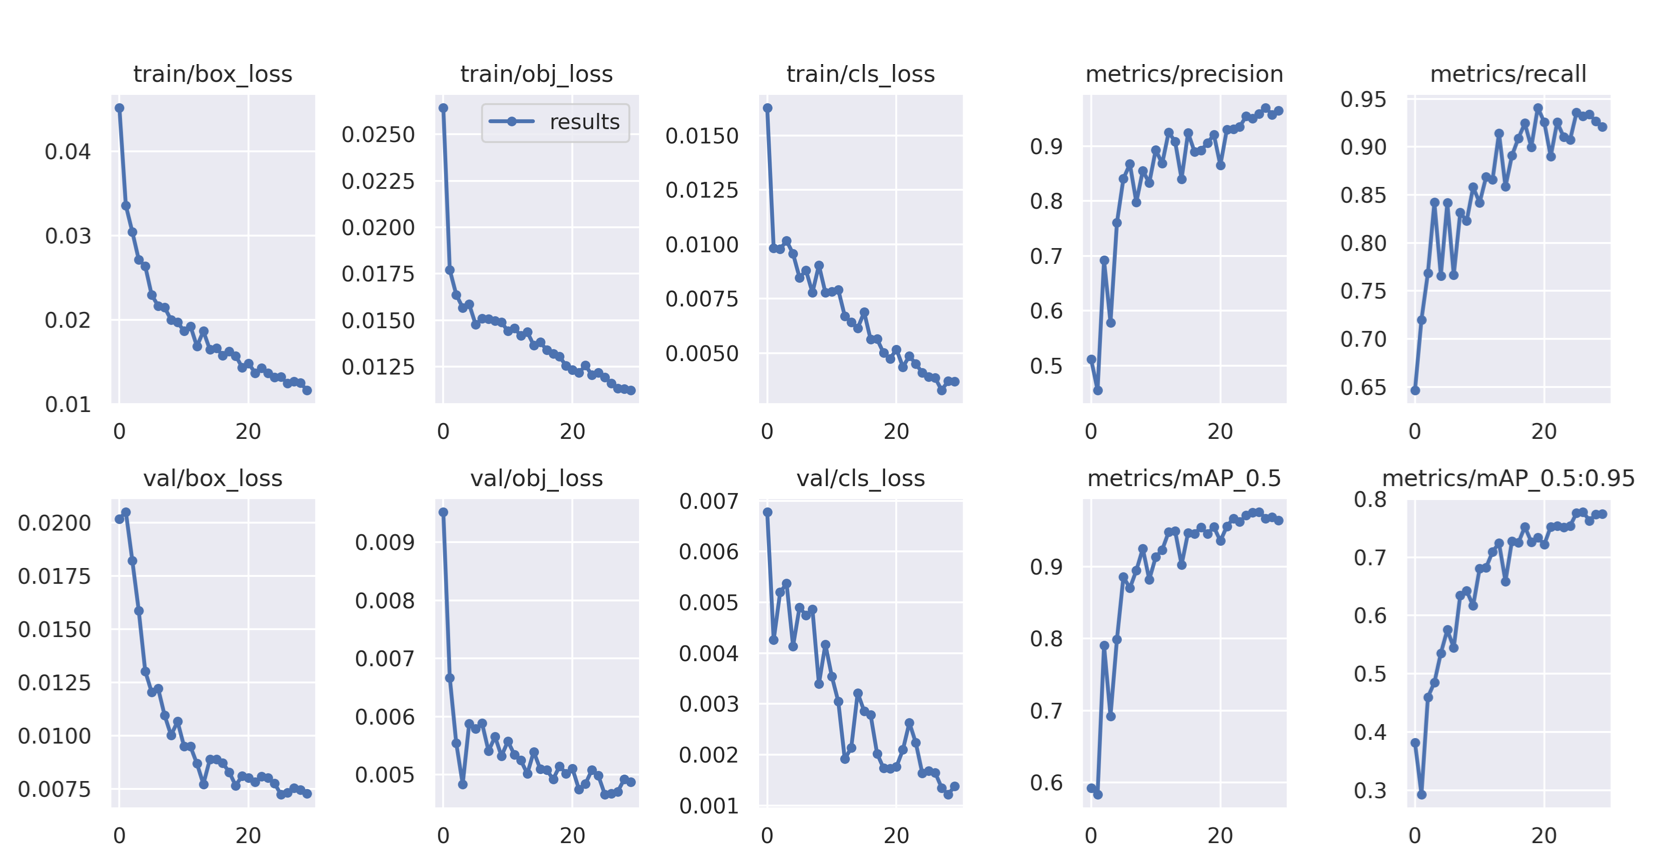

In [23]:
img = Image.open(f"{directory}/metrics.png")

img

#### F1-Confidence Curve

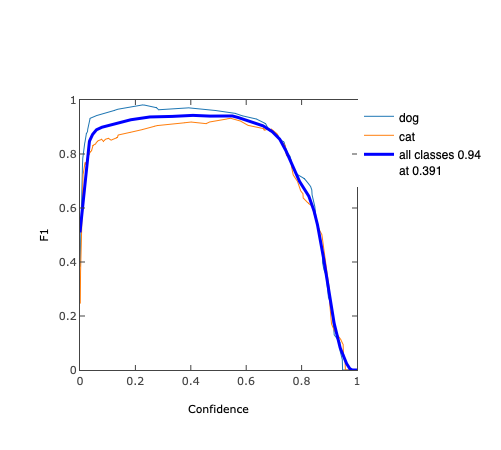

In [24]:
img = Image.open(f"{directory}/F1-ConfidenceCurve.png")

img

#### Precision-Confidence Curve

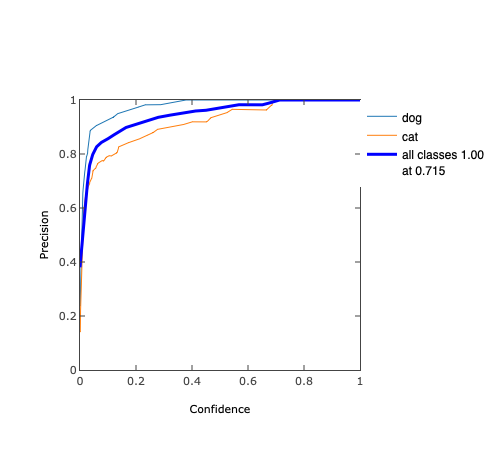

In [25]:
img = Image.open(f"{directory}/PrecisionConfidenceCurve.png")

img

#### Precision-Recall Curve

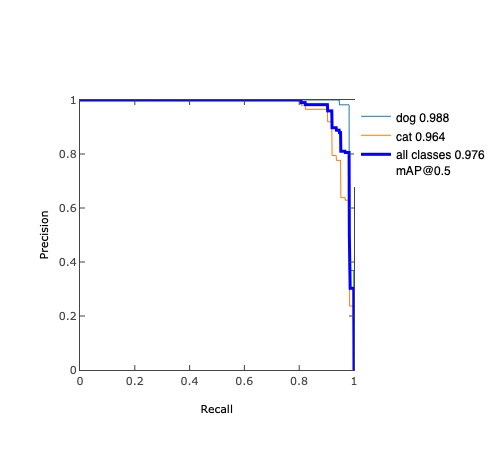

In [26]:
img = Image.open(f"{directory}/PrecisionRecallCurve.png")

img

#### Recall-Confidence Curve

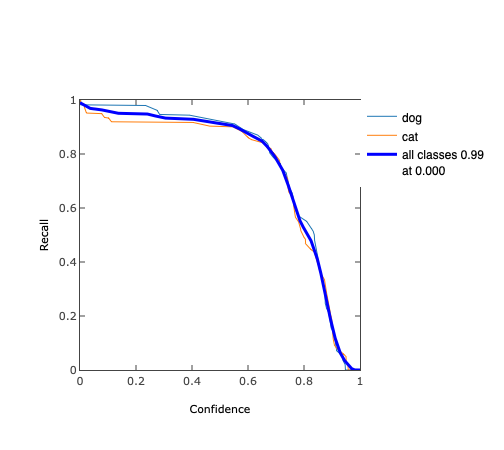

In [27]:
img = Image.open(f"{directory}/RecallConfidenceCurve.png")

img